In [1]:
import time
import pandas as pd
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/birth_rate.csv")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [3]:
# Split data/labels
data_X = np.array(data['Birth rate'])
data_Y = np.array(data['Life expectancy'])

data_X = data_X.reshape(-1, 1)
data_Y = data_Y.reshape(-1, 1)

x = Variable(torch.Tensor(data_X))
y = Variable(torch.Tensor(data_Y))

### Model definition

In [4]:
class Model(torch.nn.Module):
    def __init__(self, input_shape, output_shape):
        """Model class constructor"""
        super(Model, self).__init__()
        self.linear = nn.Linear(input_shape, output_shape)

    def forward(self, x):

        pred = self.linear(x)
        return pred

#### Loss function

In [5]:
loss_function = nn.MSELoss()

### Training loop

In [6]:
def get_weight_biases():
     return w[0].item(), b[0].item()
    
# initialise model
model = Model(x.shape[1], y.shape[1])

# initialise optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# initialise weights & biases
[w,b] = model.parameters()

def run_epoch(epoch):
    """Run an epoch 

    Args:
        epoch (int): epoch
    
    returns float, float: y_hat, loss
    """
    # forward pass
    preds = model(x)

    # loss calculation
    loss = loss_function(preds, y)

    # backward prop
    optimizer.zero_grad()
    loss.backward()

    # update weights
    optimizer.step()
    
    w, b = get_weight_biases()
    y_hat = data_X * w + b
    
    return y_hat, loss

In [7]:
history = []
start = time.time()

for epoch in range(1001):

    y_hat, loss = run_epoch(epoch)

    # save preds per epoch frequency
    if epoch % 100 == 0:
        print('Epoch {0}: {1}'.format(epoch, loss))
        history.append(y_hat)
    
print('Train Time: %f seconds' %(time.time() - start))

Epoch 0: 4825.85546875
Epoch 100: 657.172607421875
Epoch 200: 326.9822998046875
Epoch 300: 170.69729614257812
Epoch 400: 96.72477722167969
Epoch 500: 61.71226501464844
Epoch 600: 45.140357971191406
Epoch 700: 37.29643630981445
Epoch 800: 33.58375930786133
Epoch 900: 31.826461791992188
Epoch 1000: 30.994709014892578
Train Time: 0.215684 seconds


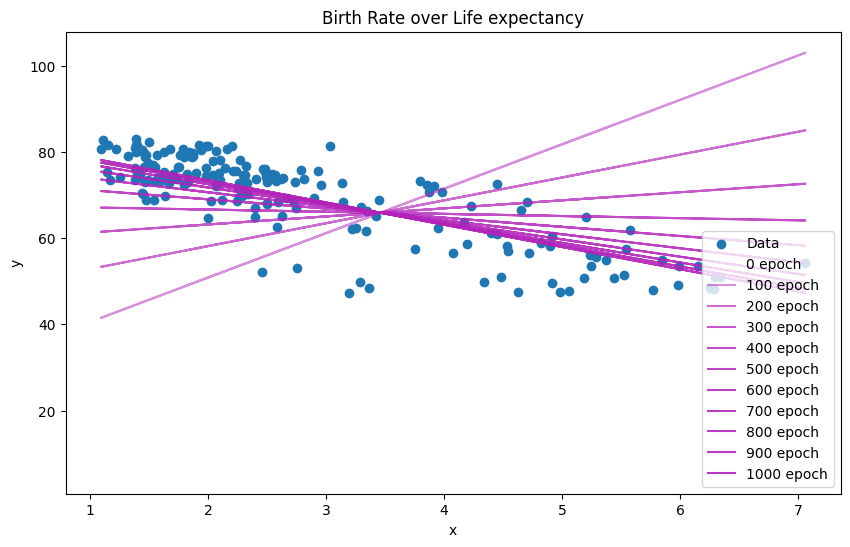

In [8]:
# Plot dataset and fit lines
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(data_X,data_Y, label="Data")
for i in range(len(history)):
    fit_axis, = ax.plot(data_X,history[i], c='#b222ba',label=str(i*100)+" epoch", alpha = i/(i+1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Birth Rate over Life expectancy')
ax.legend()